In [1]:
import os
os.chdir(os.getcwd() + '/../../')

In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, f1_score

from scripts.utils import *
from scripts.linear_utils import *

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PendragonS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PendragonS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
comments = pd.read_csv('data/comments/preprocessed_comments.csv', index_col=0)
comments = comments.dropna()
comments.head()

,toxic,comment_text
0,0,explanation why the edits make under my userna...
1,0,d'aww ! he match this background colour i be s...
2,0,"hey man , i be really not try to edit war . it..."
3,0,`` more i can not make any real suggestion on ...
4,0,"you , sir , be my hero . any chance you rememb..."


# 1. TF-IDF

In [4]:
# vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments['comment_text'])
y = comments['toxic'].to_numpy()

# train val, test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=0)

In [5]:
# total numbe of features
print(len(vectorizer.get_feature_names()))

179429


## 1.1. Linear SVM with CV

In [6]:
alphas = alphas = np.logspace(np.log10(1e-2), np.log10(5), 100)
scores = []
for alpha in alphas:
    score = train_svm_cv(X_temp, y_temp, f1_score, alpha=alpha, random_state=0)
    scores.append(score)

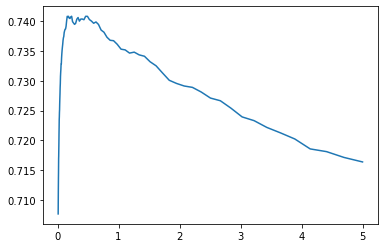

In [7]:
plt.plot(alphas, scores)

In [8]:
alphas[np.argmax(scores)]

0.2307364273173342

In [9]:
# on validation set
model = LinearSVC(max_iter=100000, class_weight='balanced', C=alphas[np.argmax(scores)]).fit(X_train, y_train)
y_hat = model.predict(X_val)

In [10]:
get_evaluation_df(y_val, y_hat, 'logistic regression')

,accuracy,precision,recall,f1,roc_auc
logistic regression,0.945794,0.677462,0.829179,0.745682,0.893667


In [11]:
# on test set
model = LinearSVC(max_iter=100000, class_weight='balanced', C=alphas[np.argmax(scores)]).fit(X_temp, y_temp)
y_hat = model.predict(X_test)

In [12]:
get_evaluation_df(y_test, y_hat, 'logistic regression')

,accuracy,precision,recall,f1,roc_auc
logistic regression,0.945104,0.673113,0.830664,0.743635,0.89395
